

# Studying the Characteristics of Missed Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The data set investigated in this project record some information about a sample of patients and if they did show up to their appointments or not. This investigation could be used to predict or give the probability of a certain patient not showing up to an appointment based on the variables discussed in this study. The variables used in this investigation are gender, time between the scheduling and the appointment, age, social welfare membership and SMS notifications.

The following questions will be investigated:

    1. Which gender group have more missed appointments?
    2. Are appointments that are registered further back in time more missed?
    3. Does different age groups have different proportions of missed appointments?
    4. Does patients that are registered in the social welfare program have more missed appointments than patients who are not?
    5. Does patients that received SMS notifications have more missed appointments than patients who did not?

Note: The No-show appointments data were used (original source on Kaggle)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
In this section, the data will be loaded and a sample of it will be checked. Some properties of the data set will be investigated. This will clarify how the data will be cleaned and trimmed to be suitable for the investigation.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


It appears that some columns, such as Patient ID and appointment ID columns, are unnecessary and it is better to remove them. 

In [3]:
# Showing statistical summary for numerical data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The previous summary of the data gives a good idea about the data in general. The patients that received SMS is about the third of all recorded patients. Since most features have values of 1 or 0, the mean gives us the fraction of 1s in that feature. For instance, 3% of patients suffer from alcoholism, 2.2% are handicapped, and around 7% have diabetes. The mean age of this sample is 37. It is noticed that the minimum age is not a sensible value for age. This could be investigated more.

In [4]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


It appears to be a single mistake. The -1 value will be replaced by 0.

In [5]:
df['Age'].replace(-1, 0, inplace= True)

In [6]:
df.query('AppointmentID == 5775010')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,0,ROMÃO,0,0,0,0,0,0,No


Checking the age distribution in our data:

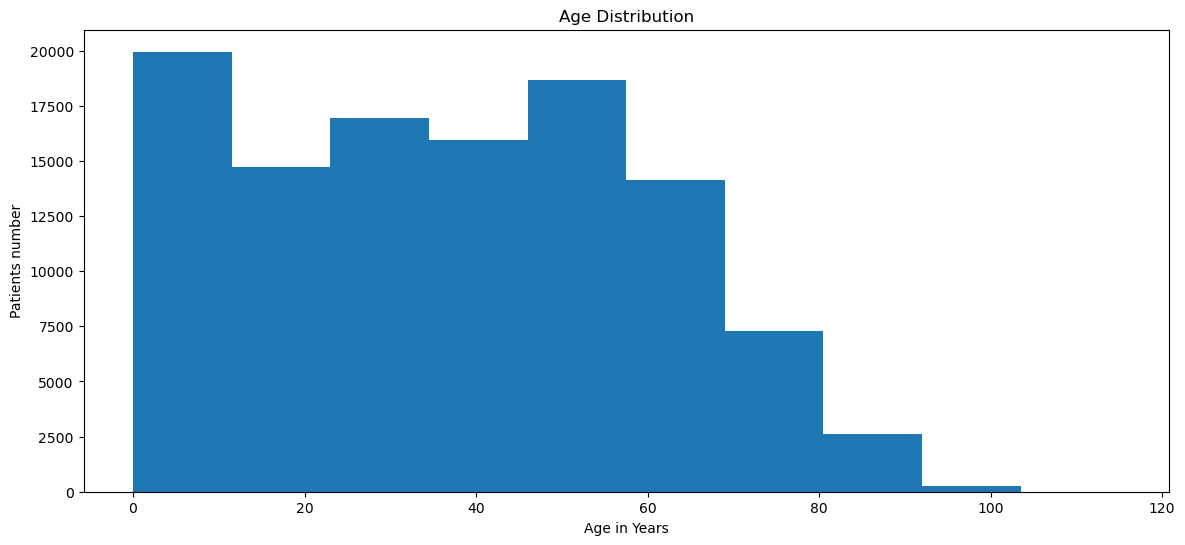

In [7]:
df['Age'].plot.hist(figsize=(14,6))
plt.title('Age Distribution')
plt.xlabel('Age in Years')
plt.ylabel('Patients number');

The right skewed histogram above shows that there are more younger patients in the data. 

In [8]:
# Showing information about the data such as data types Null data count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It is good to see that there are no missing values. The scheduled day and appointment day is recorded as a strings. Converting them to data of type date will make it easier later to manipulate and investigate the data. I decided to also convert the 'No-show' values to a 0 and 1 values where 1 is replacing yes and 0 is replacing no.



### Dropping and Renaming Columns and Converting Data Types


First step will be to remove the few unnecessary columns that will not be used in this study. After that, we will convert the data to the approbriate types and change the name of the column 'No-show' to 'NoShow'.

Dropping columns:

In [9]:
df.drop(['PatientId', 'AppointmentID','Neighbourhood', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis =1, inplace = True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,0,No


Changing the necessary columns to date data type:

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

Changing 'Yes' and 'No' values in the 'No-show' column to the numeric values 1 and 0 and rename to 'NoShow':

In [11]:
df['No-show'] = df['No-show'].str.replace('No', '0')
df['No-show'] = df['No-show'].str.replace('Yes', '1')
df['No-show'] = pd.to_numeric(df['No-show'])

In [12]:
df['No-show'].mean()

0.20193255946510807

This is the fraction of people that did not show to their appointments (around 20%) in the whole data set.

In [13]:
df.rename({'No-show':'NoShow'}, axis = 1, inplace=True)

In [14]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,NoShow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Which gender group have more missed appointments?


The first variable examined will be gender. The percentage of males and females will be investigated to see if there is a relationship between gender and patients not showing.

The calculation of the percentage of each gender in the whole data set:

In [15]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [16]:
df['Gender'].value_counts(normalize = True).mul(100).round(2)

F    65.0
M    35.0
Name: Gender, dtype: float64

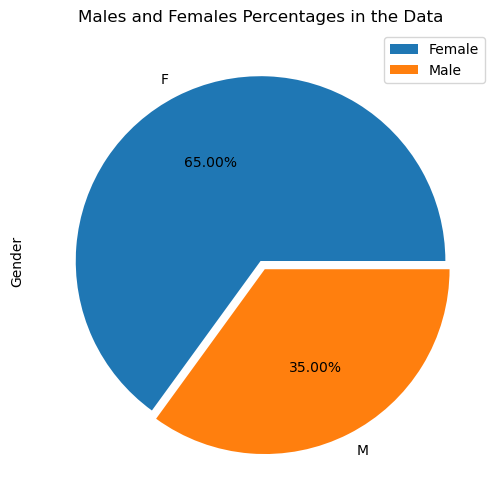

In [17]:
df['Gender'].value_counts().plot(kind='pie', explode = [0,0.05], figsize = (14,6), autopct= '%1.2f%%')
plt.title('Males and Females Percentages in the Data')
plt.legend(['Female', 'Male']);

It seems that females represent nearly two third of the population in general. The percentage of female patients from all patients who missed their appointments will be calculated:

In [18]:
def ValuesPercent(df, xVar, yVar, query = False):
    #the function is used to find the percentage of xVar values in yVar 
    if query:
        df = df.query(query).copy()
    data = df.groupby(yVar)[xVar].value_counts(normalize=True).mul(100).round(2).unstack(xVar)
    return data

ValuesPercent(df, 'Gender', 'NoShow')

Gender,F,M
NoShow,,
0,64.90,35.10
1,65.39,34.61


The percentage of males (34.61%) and females (65.39 %) in the patients that did not show up seems pretty close to their percentages in the whole population.



### Are appointments that are registered further back in time more missed?

The second feature to look at is the gap of time between the appointment and the day of registration. First, the difference between the scheduling date and the appointment date will be calculated:

In [19]:
df['TimeDifference'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days+1

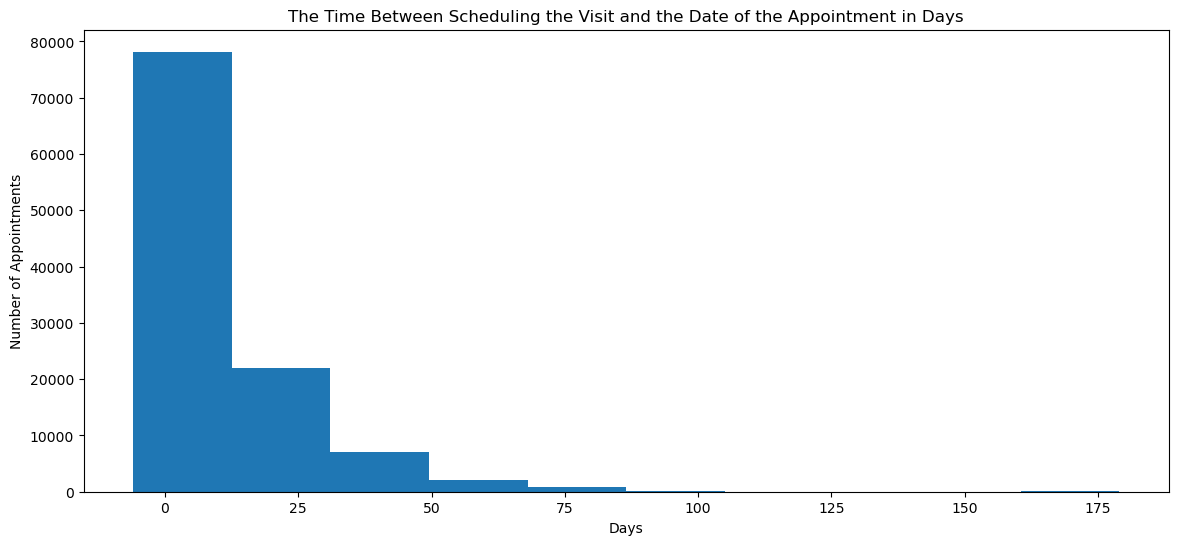

In [20]:
df['TimeDifference'].hist(figsize = (14,6))
plt.title('The Time Between Scheduling the Visit and the Date of the Appointment in Days')
plt.xlabel('Days')
plt.ylabel('Number of Appointments')
plt.grid(False);

In [21]:
df['TimeDifference'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: TimeDifference, dtype: float64

There seems to be negative values in the difference of time calculated.

In [22]:
df.query('TimeDifference < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,SMS_received,NoShow,TimeDifference
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,0,0,1,-1
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,0,0,1,-1
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,0,0,1,-1
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,0,0,1,-6
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,0,0,1,-1


It seems there are some appointment dates preceding the registration of the appointment. It will be assumed that this was a mistake of reversing the dates at the time of data entry, and the absolute difference will be considered regardless of which date is prior to the other.

In [23]:
df['TimeDifference'] = df['TimeDifference'].abs()

In [24]:
df['TimeDifference'].describe()

count    110527.000000
mean         10.183883
std          15.254875
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: TimeDifference, dtype: float64

In [25]:
df.query('TimeDifference >= 4 and NoShow == 1').shape[0]/df.query('TimeDifference >= 4').shape[0]

0.29962468359954614

In [26]:
df.query('TimeDifference < 4 and NoShow == 1').shape[0]/df.query('TimeDifference < 4').shape[0]

0.09682205777393788

From the above investigation, a difference of 4 days seems to split the data in half. In the upper half with a difference of 4 days and more it seems that the percentage of patients not showing up is more (30 %) than the patients in the lower half (9.7%) where the appointment is registered in less than 4 days. It seems in this data set, when a patient scheduling day is closer to the appointment day, the patient is more likely to not miss the appointment.


### Does different age groups have different proportions of missed appointments?


Next, the factor of age will be investigated. The data will be seperated into 4 equal parts. The percentage of patients that missed their appointments in each group will be calculated.

In [27]:
df['Age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [28]:
max_age = df['Age'].max()
labels = ['Under 18', '18 to 37', '37 to 55', 'Older than 55']
df['AgeIntervals'] = pd.cut(df['Age'], [0, 18, 37, 55, max_age], labels = labels, include_lowest=True)
ValuesPercent(df, 'NoShow', 'AgeIntervals')

NoShow,0,1
AgeIntervals,,
Under 18,78.01,21.99
18 to 37,76.46,23.54
37 to 55,80.47,19.53
Older than 55,84.36,15.64


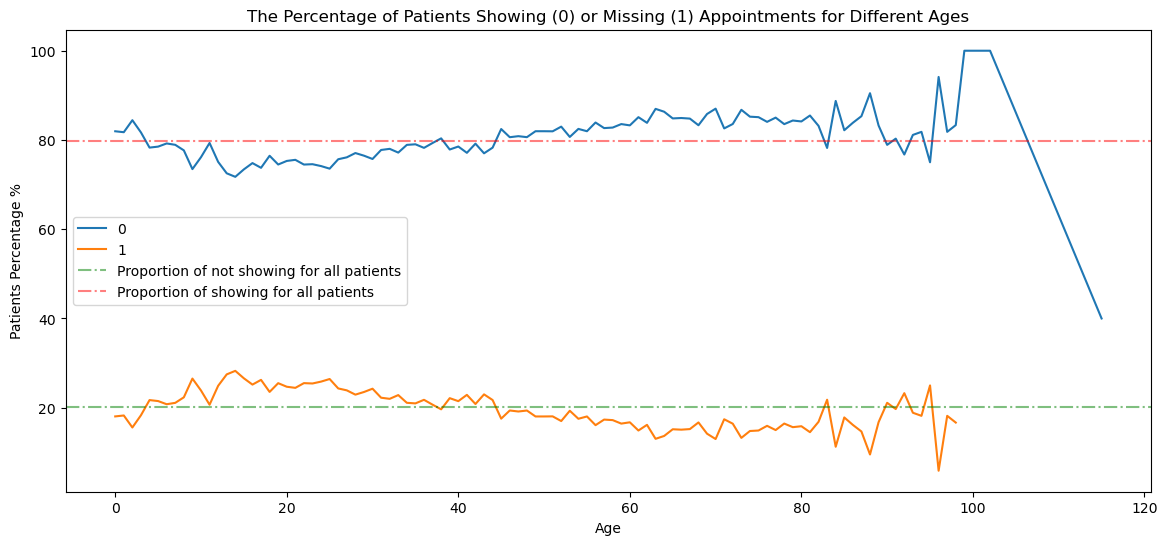

In [29]:
ValuesPercent(df, 'NoShow', 'Age').plot(figsize=(14,6))
plt.title('The Percentage of Patients Showing (0) or Missing (1) Appointments for Different Ages')
plt.ylabel('Patients Percentage %')
plt.xlabel('Age')
plt.axhline(df['NoShow'].value_counts(normalize=True)[1]*100, color = 'green', ls='-.', alpha = 0.5, label= 'Proportion of not showing for all patients')
plt.axhline(df['NoShow'].value_counts(normalize=True)[0]*100, color = 'red', ls='-.', alpha = 0.5, label= 'Proportion of showing for all patients')
plt.legend();

There is an obvious trend in this data set. The probability of missing appointments increase in younger age groups, especially in patients aged from 18 to 37.



### Does patients who are registered in the social welfare program have more missed appointments than patients who are not?


Next variable to examine will be welfare program membership. The percentage of patients who are registered in the welfare program and missed their appointments will be compared to the percentage who are not covered by the program and also missed their appointments.

In [30]:
df.groupby(['Scholarship'])['NoShow'].count()

Scholarship
0    99666
1    10861
Name: NoShow, dtype: int64

In [31]:
ValuesPercent(df, 'NoShow', 'Scholarship')

NoShow,0,1
Scholarship,,
0,80.19,19.81
1,76.26,23.74


The percentage of people who missed their appointments in the group that are registered in the social welfare program is 23.7% compared to 19.8% for the people who are not in the program.

 
 
 
### Does patients that received SMS notifications have more missed appointments than patients who did not?


The last variable considered in this investigation, that might affect patients showing up or not, is receiving SMS notifications.

In [32]:
ValuesPercent(df, 'NoShow', 'SMS_received')

NoShow,0,1
SMS_received,,
0,83.30,16.70
1,72.43,27.57


There is a difference of more than 10% between the two groups in terms of the percentage of patients that did not show up. It is unexpected to see that people who received SMS have larger percentage of people missing their appointments.

### Combining Different Variables

Finally, the data was filtered to include appointments for patients aged between 18 and 37 that are in the social welfare program and were registered before the appointment by 4 days or more.

First, the quantity of appointments after the filtration is checked:

In [33]:
df.query('TimeDifference > 4 and Age > 18 and Age < 37 and Scholarship == 1' ).shape[0]

1690

The percentage of patients that missed the appointments is then calculated for this filtered data:

In [34]:
df.query('TimeDifference > 4 and Age > 18 and Age < 37 and Scholarship == 1 and NoShow == 1').shape[0]/df.query('TimeDifference > 4 and Age > 18 and Age < 37 and Scholarship == 1' ).shape[0]

0.40236686390532544

The percentage of patients that missed their appointment in the previous filtered data is around 40%.

<a id='conclusions'></a>
## Conclusions


The investigated data set have many variables that could be examined to see their effect on the patients missing their appointments. This study of the data set included the investigation of few variables such as gender, age, time between the scheduling and the appointment, social welfare program membership and SMS notifications.

The gender of the patient does not seem to be correlated with missing an appointment. The percentage of females in the population of patients that did not show up is 65.4%, which is very close to the females percentage in the whole data set (around 65%).

For the second variable, the data was seperated into two groups in terms of the difference between the scheduling date and the appointment date. The first group included the appointments that have been scheduled in 4 days or more before the appointment. The percentage of patients that missed their appointment in this group is around 30%. The second group where the registration was in less than 4 days before the appointment has the percentage of 9.7% patients not showing up. This observation suggest that earlier appointment registration will increase the possibility of a patient missing the appointment in this data set.

The data was seperated into four age groups for the third variable investigation. The first group of patients are aged 18 or less. The percentage of patients that did not show up in this group is 22%. The second group, aged between 18 and 37, and the third group, aged between 37 and 55, and the fourth group, aged more than 55, percentages of patients not showing up are 23.5%, 19.5%, and 15.6% respectively. It is obvious that the increase in age is correlated with the decrease of patients missing their appointments in general. 

The patients who are covered by the social welfare program seems to have larger percentage of people not showing up (23.7%) compared to people who are not in the program (19.8%).

In the investigation of the last variable, the data was split into patients that received SMS and patients that did not receive SMS. It was unexpected to discover that the group of patients that received SMS notifications have more people not showing to the appointments (around 27.6%) compared to the group that did not receive SMS notifications (around 16.7% did not show up).

In the final section in the data exploration, different variables that have high correlation with patients missing their appointments were chosen to filter the data to investigate the patients that have all these variables combined. The filtered data included patients aged between 18 and 37 that are in the social welfare program and were registered before the appointment day by 4 days or more. The filtered data included 1690 appointments. From all the patients in the filtered data, 40% of patients did not show up to their appointments.

In summary, it could be said that the variables discussed in this study have some correlation with patients missing their appointments, and the correlation increase when some of these variables are combined. Regarding the issue of using this to predict the behavior of future patients based on the variables discussed here, further investigation should be done. For example, checking if the sample, which in this study is the whole data set, is good to represent the whole population of patients in the future, and if it is large enough. Another limitation is to check if the variables are really correlated to patients missing their appointments, or they are just correlated only by chance. These investigations could be done by getting more data samples or splitting the data into testing and training sets to reach more accurate models.